Load DataSet

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [2]:
data = pd.read_csv('/content/TwitterSentimentData.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now #motivation


In [3]:
#here 0 represnt positive tweet and 1 as negative tweet

In [4]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      300 non-null    int64 
 1   label   300 non-null    int64 
 2   tweet   300 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull().sum() #to check is there any missing value?

id       0
label    0
tweet    0
dtype: int64

In [7]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now #motivation


In [8]:
data['label'].value_counts(normalize=True) #to check class balance

0    0.93
1    0.07
Name: label, dtype: float64

<Axes: >

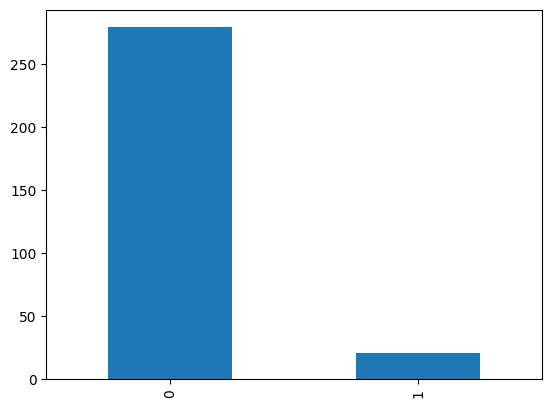

In [9]:
data['label'].value_counts().plot(kind='bar')

Data Preprocessing

In [10]:
data['tweet'][24]

' @user #tgif   #ff to my #gamedev #indiedev #indiegamedev #squad! @user @user @user @user @user'

In [11]:
import re

In [12]:
# Substitute 's with " is"
re.sub(r"'s\b", " is", data['tweet'][24])

' @user #tgif   #ff to my #gamedev #indiedev #indiegamedev #squad! @user @user @user @user @user'

In [13]:
# Removing the user mentions
data['tweet'][11]

'we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #'

In [14]:
#to retain on the alphabets & digits

re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #'

In [15]:
# remive the hashtags
data['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [16]:
re.sub("#", "", data['tweet'][0]) #

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   run'

In [17]:
re.sub(r"http\S+", "", data['tweet'][0])

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [18]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]

'beautiful sign by vendor 80 for $45.00!! #upsideofflorida #shopalyssas   #love '

In [19]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0]) #to retain non alphabetic letters

'  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction     run'

In [20]:
!pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import nltk
import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'do', 'i', 'each', 'is', "weren't", "it's", 'than', 'who', 'there', 'wouldn', 'then', 'just', 'or', 'aren', 'at', 'll', 've', "she's", 'don', "won't", 'was', 'above', 'have', 'which', 'that', 'both', 'mustn', 'being', 'below', 'very', 'me', 'why', 'mightn', "doesn't", "shan't", 'his', 'too', 'an', 'having', 'he', 'once', 'itself', 'didn', 'themselves', 'further', 'into', 'were', 'of', "isn't", 'ours', 'had', 're', 'until', 'him', 'as', 'm', 'shan', 'are', 'needn', "hadn't", 'how', 'been', 'own', 't', 'haven', 'same', 'did', 'while', 'about', 'their', 'doesn', 'here', 'few', 'but', 'during', "mustn't", 'yourselves', 's', "aren't", "you've", 'any', 'yourself', 'after', 'such', 'will', 'all', 'theirs', 'because', 'most', 'they', 'our', "don't", "wouldn't", 'when', 'd', 'isn', 'before', 'by', 'am', 'if', "shouldn't", 'down', 'nor', 'on', "hasn't", 'hasn', 'between', 'only', 'has', 'no', 'again', 'not', 'against', 'whom', 'with', "that'll", 'o', 'myself', 'them', 'now', 'doing', "haven't",

In [23]:
len(nltk_stopwords)

179

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'ten', 'do', 'either', 'i', 'seems', 'eight', 'latter', 'however', 'than', 'rather', 'who', 'side', 'there', 'latterly', 'last', 'un', 'at', 'etc', 'together', 'cant', 'always', 'was', 'have', 'three', 'which', 'without', 'very', 'his', 'too', 'twenty', 'another', 'indeed', 'he', 'itself', 'amongst', 'formerly', 'whence', 'were', 'of', 'would', 'herein', 're', 'until', 'him', 'even', 'thick', 'are', 'forty', 'seeming', 'part', 'been', 'own', 'perhaps', 'throughout', 'full', 'same', 'inc', 'behind', 'while', 'fifteen', 'here', 'co', 'but', 'yourself', 'cry', 'will', 'all', 'de', 'wherein', 'con', 'thereupon', 'though', 'our', 'bottom', 'anywhere', 'when', 'fill', 'am', 'hereby', 'if', 'nor', 'on', 'among', 'former', 'five', 'front', 'may', 'nevertheless', 'has', 'top', 'no', 'whether', 'still', 'onto', 'seem', 'detail', 'becomes', 'again', 'against', 'first', 'call', 'please', 'whatever', 'give', 'hundred', 'them', 'amoungst', 'made', 'neither', 'see', 'less', 'ourselves', 'four', 'nam

In [25]:
len(sklearn_stopwords)

318

In [26]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'do', 'i', 'each', 'is', 'than', 'who', 'there', 'then', 'or', 'at', 'was', 'above', 'have', 'which', 'that', 'both', 'being', 'below', 'very', 'me', 'why', 'his', 'too', 'an', 'he', 'once', 'itself', 'themselves', 'further', 'into', 'were', 'of', 'ours', 'had', 're', 'until', 'him', 'as', 'are', 'how', 'been', 'own', 'same', 'while', 'about', 'their', 'here', 'few', 'but', 'during', 'yourselves', 'any', 'yourself', 'after', 'such', 'will', 'all', 'because', 'most', 'they', 'our', 'when', 'before', 'by', 'am', 'if', 'down', 'nor', 'on', 'between', 'only', 'has', 'no', 'again', 'not', 'against', 'whom', 'with', 'myself', 'them', 'now', 'ourselves', 'her', 'up', 'so', 'other', 'out', 'over', 'you', 'and', 'herself', 'it', 'in', 'hers', 'from', 'your', 'to', 'these', 'yours', 'some', 'where', 'what', 'my', 'through', 'she', 'be', 'under', 'off', 'the', 'can', 'more', 'a', 'for', 'this', 'we', 'should', 'those', 'its', 'himself'}


In [27]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [28]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [29]:
len(combined_stopwords)

378

In [30]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#converts the word to its meaningful base form

In [31]:
data['tweet'][63].split()

["you've", 'really', 'hu', 'my', 'feelings', ':(']

In [32]:
nltk.download('wordnet')
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent #it generate lemmanized version

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


"you've really hu my feeling :( "

In [33]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import contractions
data['tweet'][24]

' @user #tgif   #ff to my #gamedev #indiedev #indiegamedev #squad! @user @user @user @user @user'

In [35]:
contractions.fix(data['tweet'][24])

' @user #tgif   #ff to my #gamedev #indiedev #indiegamedev #squad! @user @user @user @user @user'

define cleaner function to clean the tweet

In [36]:
import re

In [37]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [38]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [39]:
cleaned_tweets[:5]

['when a father is dysfunctional and is so selfish he drag his kid into his dysfunction run ',
 'thanks for lyft credit i cannot use because they do not offer wheelchair van in pdx disapointed getthanked ',
 'bihday your majesty ',
 'model i love you take with you all the time in you are ',
 'factsguide society now motivation ']

In [40]:
cleaned_tweets[24]

'tgif ff to my gamedev indiedev indiegamedev squad '

In [41]:
data['tweet'][200]

'alreemgroup #aly_alshahawy #ad #cute #summer #photographerdubai #sun   #hair #mydubai… '

In [42]:
data['tweet'][200].split()

['alreemgroup',
 '#aly_alshahawy',
 '#ad',
 '#cute',
 '#summer',
 '#photographerdubai',
 '#sun',
 '#hair',
 '#mydubai…']

In [43]:
cleaned_tweets[200]

'alreemgroup aly alshahawy ad cute summer photographerdubai sun hair mydubai '

In [44]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drag his kid into his dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for lyft credit i cannot use because they do not offer wheelchair van in pdx disapointed getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model i love you take with you all the time in you are
4,5,0,factsguide: society now #motivation,factsguide society now motivation


Data visualization

In [45]:
#to collect all the words from all the tweets into a single list
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run', '@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked', 'bihday', 'your', 'majesty', '#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time']


1941

In [46]:
import matplotlib.pyplot as plt

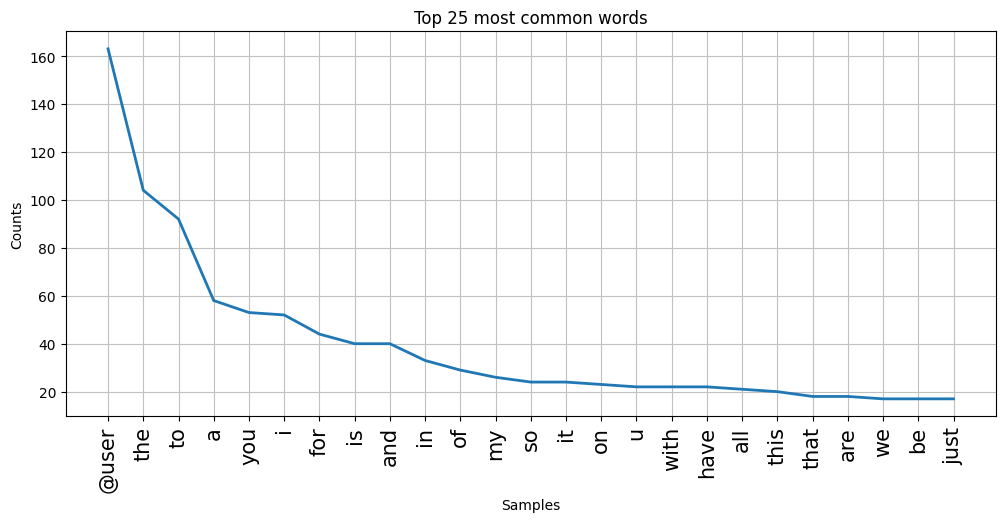

In [47]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [48]:
#for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drag', 'his', 'kid', 'into', 'his', 'dysfunction', 'run', 'thanks', 'for', 'lyft', 'credit', 'i', 'cannot', 'use', 'because', 'they', 'do', 'not', 'offer', 'wheelchair', 'van', 'in', 'pdx', 'disapointed', 'getthanked', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'you', 'take', 'with', 'you', 'all', 'the', 'time', 'in', 'you']


In [49]:
len(set(all_words)) # this is the number of unique words in the list

1455

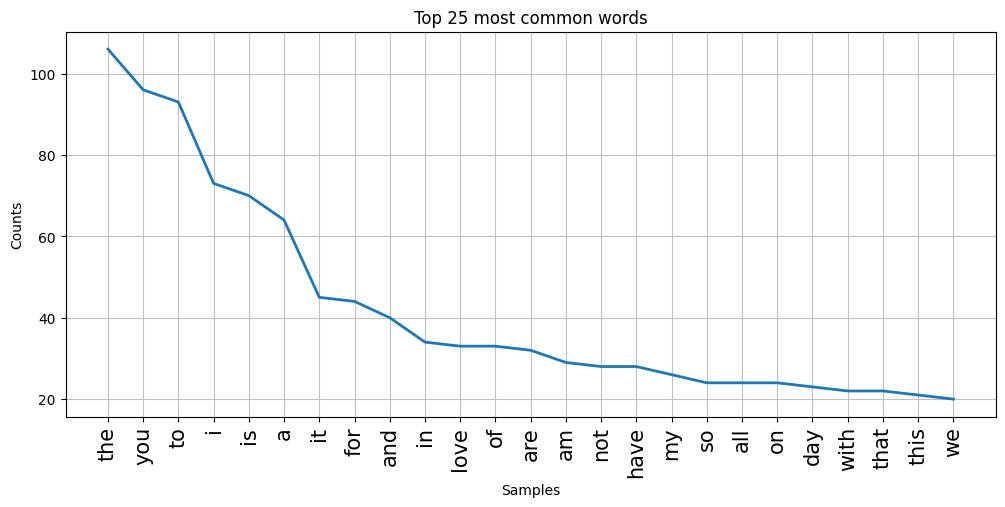

In [50]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [51]:
type(combined_stopwords)

set

In [52]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text
    #defination to calculates the frequency distribution of words i

In [53]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['father dysfunctional selfish drag kid dysfunction run ', 'thanks lyft credit use offer wheelchair van pdx disapointed getthanked ', 'bihday majesty ', 'model love time ', 'factsguide society motivation ', 'huge fan fare big talking leave chaos pay dispute allshowandnogo ', 'camping tomorrow danny ', 'school year year exam think school exam hate imagine actorslife revolutionschool girl ', 'love land allin cavs champion cleveland clevelandcavaliers ', 'welcome ']


In [54]:
data.columns
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drag his kid into his dysfunction run,father dysfunctional selfish drag kid dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for lyft credit i cannot use because they do not offer wheelchair van in pdx disapointed getthanked,thanks lyft credit use offer wheelchair van pdx disapointed getthanked
2,3,0,bihday your majesty,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model i love you take with you all the time in you are,model love time
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society motivation


['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run', 'thanks', 'lyft', 'credit', 'use', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked', 'bihday', 'majesty', 'model', 'love', 'time', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'dispute', 'allshowandnogo', 'camping', 'tomorrow', 'danny', 'school', 'year', 'year', 'exam', 'think', 'school', 'exam', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl']


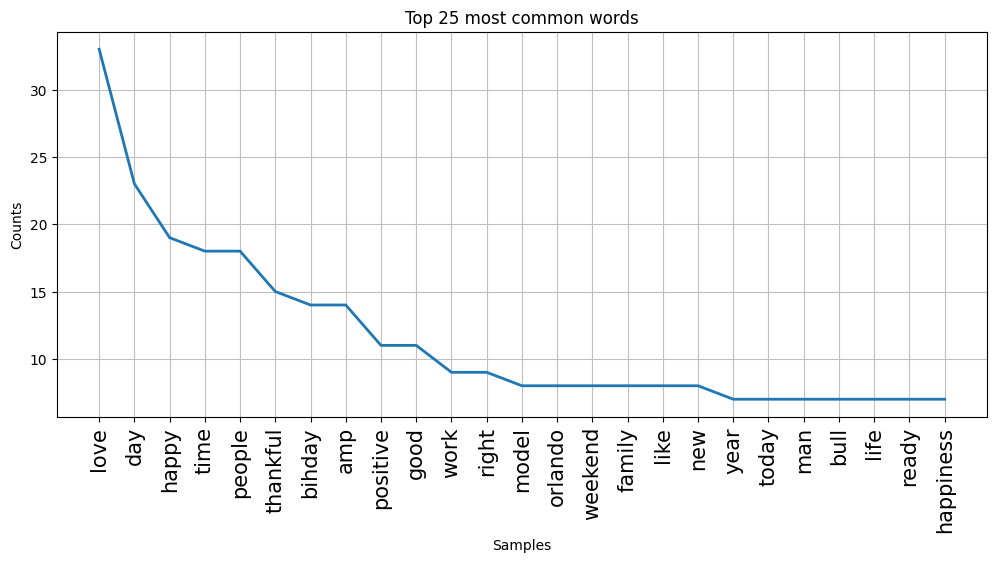

In [55]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()
# to calculates the frequency distribution of words i

In [56]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [57]:
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drag his kid into his dysfunction run,father dysfunctional selfish drag kid dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for lyft credit i cannot use because they do not offer wheelchair van in pdx disapointed getthanked,thanks lyft credit use offer wheelchair van pdx disapointed getthanked
2,3,0,bihday your majesty,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model i love you take with you all the time in you are,model love time
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society motivation


Feaure extraction

In [58]:
data.shape #dimension of frame work

(300, 5)

In [59]:
#for matrix representation of dataset
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [60]:
CV_features.shape

(300, 1437)

In [61]:
CV_features[0]

<1x1437 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [62]:
type(CV_features[0])  # each row is a compressed spare row

scipy.sparse._csr.csr_matrix

In [63]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [64]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df
# Document-Term-Matrix X = [N x p ]
# N = no. of documentns
# p = no. of unique words in the vocab!!# this is your D

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.size/1e6  # these many elements/numbers are present in the df

0.4311

In [66]:
CV_features[10].todense() # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [67]:
import numpy as np
np.count_nonzero(df)

3298

In [68]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.7650197170030155

To build a model

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)

1.0
0.9333333333333333


In [71]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)

0.9377777777777778
0.8666666666666667


In [72]:
# leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [73]:
X = CV_features
y = data['label']

In [74]:
# crOSS VALIDATE THE LR1 model
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.88333333 0.91666667 0.83333333 0.91666667 0.86666667]
88.33 3.16


In [75]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)
results

{'fit_time': array([0.00875807, 0.00751162, 0.00415039, 0.0041337 , 0.0045321 ]),
 'score_time': array([0.0012126 , 0.00114393, 0.00107217, 0.00111938, 0.00115204]),
 'test_score': array([0.88333333, 0.91666667, 0.83333333, 0.9       , 0.86666667]),
 'train_score': array([0.93333333, 0.975     , 0.94166667, 0.94583333, 0.94166667])}

In [76]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

[0.93333333 0.975      0.94166667 0.94583333 0.94166667]
94.75 1.43


In [77]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

[0.88333333 0.91666667 0.83333333 0.9        0.86666667]
88.0 2.87


In [78]:
# Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [79]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [80]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 1e-05}, 0.93, 0)

In [81]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [82]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

93.0

In [83]:
# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

93.0

In [84]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100
grid_results.cv_results_['mean_test_score']
grid_results.cv_results_['mean_train_score']

array([0.93      , 0.93      , 0.86      , 0.86666667, 0.895     ,
       0.915     , 0.93916667, 0.94166667, 0.9475    , 0.96333333,
       0.96416667, 0.96833333, 0.97083333, 0.97416667, 0.97666667,
       0.97916667, 0.9825    , 0.98416667, 0.98583333, 0.98583333])

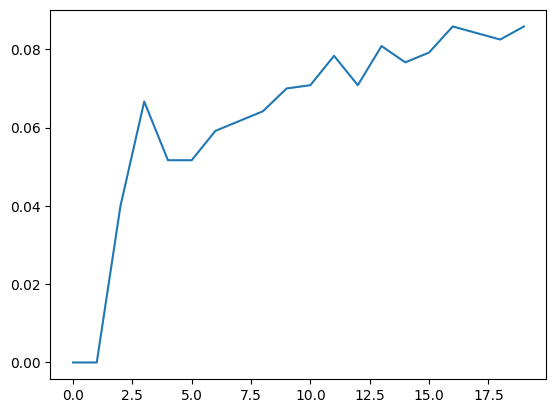

In [85]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [86]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [87]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [88]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([0.        , 0.        , 0.04      , 0.06666667, 0.05166667,
       0.05166667, 0.05916667, 0.06166667, 0.06416667, 0.07      ,
       0.07083333, 0.07833333, 0.07083333, 0.08083333, 0.07666667,
       0.07916667, 0.08583333, 0.08416667, 0.0825    , 0.08583333])

For postprocessing

In [89]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

88.33 3.16


In [90]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [91]:
CV_pipe.fit(X,y) #fit the pipeline

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [92]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

1437

Word embedding

In [93]:
tweets_list = list(data['cleaned_tweets_w/o_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets

['when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drag',
 'his',
 'kid',
 'into',
 'his',
 'dysfunction',
 'run']

In [94]:
# Creating your own Word2Vec Model & Train
#to learn distributed representations of words by predicting the context words given a target word.
#to capture the surrounding context of a word in a given corpus.
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [95]:
# summarize the loaded model
print(cbow_model)

Word2Vec<vocab=126, vector_size=300, alpha=0.025>


In [96]:
cbow_model.wv.index_to_key[:20]  # this your vocab

['the',
 'you',
 'to',
 'i',
 'is',
 'a',
 'it',
 'for',
 'and',
 'in',
 'love',
 'of',
 'are',
 'am',
 'have',
 'not',
 'my',
 'on',
 'all',
 'so']

In [97]:
len(cbow_model.wv.index_to_key)

126

In [98]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

# np.mean(model[doc], axis=0)

In [99]:
tweets_temp = data['cleaned_tweets_w/o_SW'].apply(document_vector)

<ipython-input-98-ab5affc3cd8c>:11: RuntimeWarning: Mean of empty slice.
  wv1_mean = wv1_.mean(axis=0)


In [100]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

0    [-0.0013821644, 0.0011881584, 0.0014661971, -0.0012742494, -0.00019973896, -0.00054954336, 0.0018664381, 0.0031570725, 0.0015331192, -0.0016956164, -0.0006269156, -0.00080423284, -0.0009828857, 0....
1    [-0.0005012006, 0.0019622375, -0.00012813916, 0.0012590208, 0.00014337114, -0.00029954265, 0.0014871265, 0.0019538233, 0.00018789682, -4.629664e-05, 0.0009535809, 0.0006411772, 0.00021969253, 0.00...
2    [0.0016588522, 0.001998095, -0.0026845594, -0.0015153401, 0.0013582057, 0.00019540236, 0.0024436344, 0.0019766975, 0.00076327287, -0.0018854411, 0.0012908678, -0.0017495928, 0.00019788061, -0.0024...
3    [-0.0012605977, 0.0022618715, -0.0004930126, 0.0004999654, -0.00040018145, -0.0009109779, 0.0030835639, 0.0036650884, 0.00042016405, -0.0012929594, 0.0012408916, -0.00048148932, -9.999588e-06, -0....
4    [-0.00263397, -0.0013074506, 0.0007899966, 0.0015061296, -0.0028757027, 0.0023702863, 0.0038073615, 5.8487436e-05, -0.0024367822, -0.0034888198, -0.0010532249, 0.0029611574, -

In [101]:
tweets_temp[0].shape

(300,)

In [102]:
type(tweets_temp)

pandas.core.series.Series

In [103]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(300, 300)

In [104]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [105]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,-0.001382,0.001188,0.001466,-0.001274,-0.000200,-0.000550,0.001866,0.003157,0.001533,-0.001696,...,0.001853,0.001229,0.000998,0.000270,0.000252,0.000472,0.000518,-0.000223,0.000893,0
1,-0.000501,0.001962,-0.000128,0.001259,0.000143,-0.000300,0.001487,0.001954,0.000188,-0.000046,...,0.001588,-0.001058,0.001603,0.001501,0.001761,0.000665,-0.000423,0.001042,-0.000132,0
2,0.001659,0.001998,-0.002685,-0.001515,0.001358,0.000195,0.002444,0.001977,0.000763,-0.001885,...,0.001695,0.001665,0.002287,0.001233,0.000366,0.002905,0.001934,0.000193,0.000442,0
3,-0.001261,0.002262,-0.000493,0.000500,-0.000400,-0.000911,0.003084,0.003665,0.000420,-0.001293,...,0.002946,-0.000264,0.000406,0.002400,0.002615,0.000018,-0.001116,0.001203,-0.000536,0
4,-0.002634,-0.001307,0.000790,0.001506,-0.002876,0.002370,0.003807,0.000058,-0.002437,-0.003489,...,0.000774,0.002648,0.002794,0.000607,0.002305,-0.002393,-0.000891,0.003380,-0.000517,0


In [106]:
df.shape

(290, 301)

In [107]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(290, 300)

In [108]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

95.52 0.75
82.41 2.97


In [110]:
X = data['cleaned_tweets_w/o_SW']
y = data['label']

In [111]:
# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

86.92 2.64
79.0 7.12


115

Word embedding with GloVe Model

In [112]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [113]:
# load the converted model
filename = 'word2vec.txt'
#model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [114]:
#model.get_vector('analytics')

In [115]:
def document_vector_GloVe(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(model.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

Deep learning with binary feature

In [116]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pydot
import keras.backend as K

In [117]:
# This user-defined function return a Deep Learning Model

def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model1.png', show_shapes=True)
    return model

In [118]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]

    for i in range(n_repeats):
        # define network
        model = define_model(n_words)

        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)

        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)

        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [119]:
# fit a tokenizer
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() # num_words=1000
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [120]:
# create the tokenizer
train_docs = data['cleaned_tweets_with_SW']
tokenizer = create_tokenizer(train_docs)

In [121]:
# encode data
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [122]:
X.shape

(300, 1257)

In [123]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
y = data['label']

In [125]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42)

In [126]:
Xtrain.shape, Xtest.shape

((240, 1257), (60, 1257))

In [127]:
# define network
K.clear_session()
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                80512     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 82,625
Trainable params: 82,625
Non-trainable params: 0
_________________________________________________________________


In [128]:
# fit network
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 2.23419, saving model to BestModel.h5
2/2 - 2s - loss: 2.3458 - accuracy: 0.2315 - val_loss: 2.2342 - val_accuracy: 0.3333 - 2s/epoch - 905ms/step
Epoch 2/25

Epoch 2: val_loss improved from 2.23419 to 2.12021, saving model to BestModel.h5
2/2 - 0s - loss: 2.2187 - accuracy: 0.5000 - val_loss: 2.1202 - val_accuracy: 0.6250 - 123ms/epoch - 62ms/step
Epoch 3/25

Epoch 3: val_loss improved from 2.12021 to 2.01357, saving model to BestModel.h5
2/2 - 0s - loss: 2.1017 - accuracy: 0.7269 - val_loss: 2.0136 - val_accuracy: 0.7917 - 195ms/epoch - 98ms/step
Epoch 4/25

Epoch 4: val_loss improved from 2.01357 to 1.91290, saving model to BestModel.h5
2/2 - 0s - loss: 1.9921 - accuracy: 0.8565 - val_loss: 1.9129 - val_accuracy: 1.0000 - 137ms/epoch - 68ms/step
Epoch 5/25

Epoch 5: val_loss improved from 1.91290 to 1.81805, saving model to BestModel.h5
2/2 - 0s - loss: 1.8900 - accuracy: 0.9306 - val_loss: 1.8181 - val_accuracy: 0.9583 - 147ms/epoc

Text(0, 0.5, 'Loss Fn valaues')

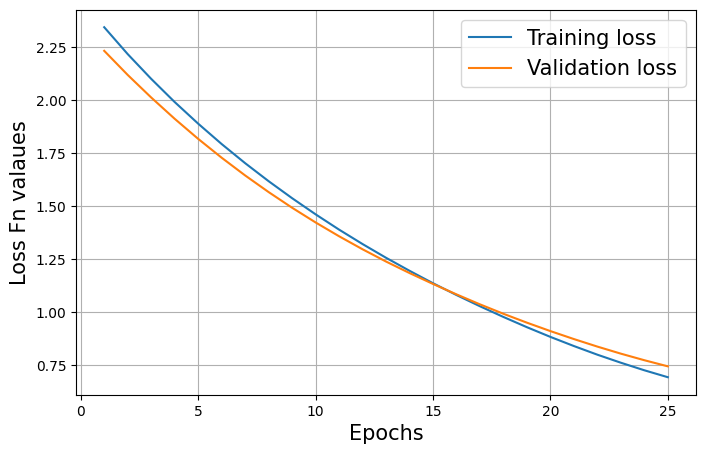

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy')

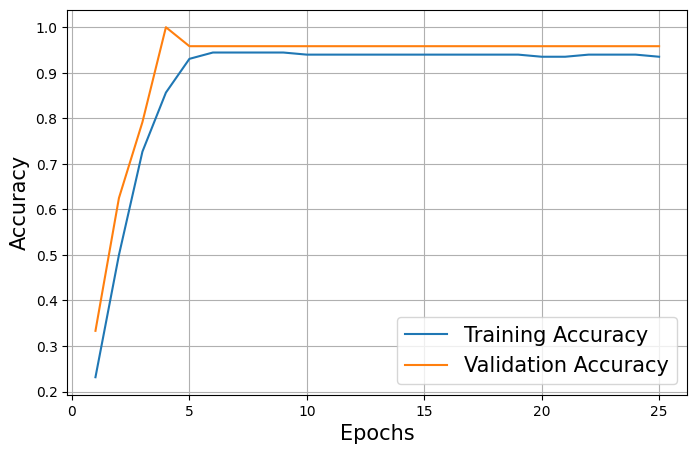

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,26)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)